In [14]:
%matplotlib inline
from matplotlib import style, ticker
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Get a list of column names and types for measurement
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Get a list of column names and types for station
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Meas = Base.classes.measurement
Stat = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Meas.date).order_by(Meas.date.desc()).first()

('2017-08-23',)

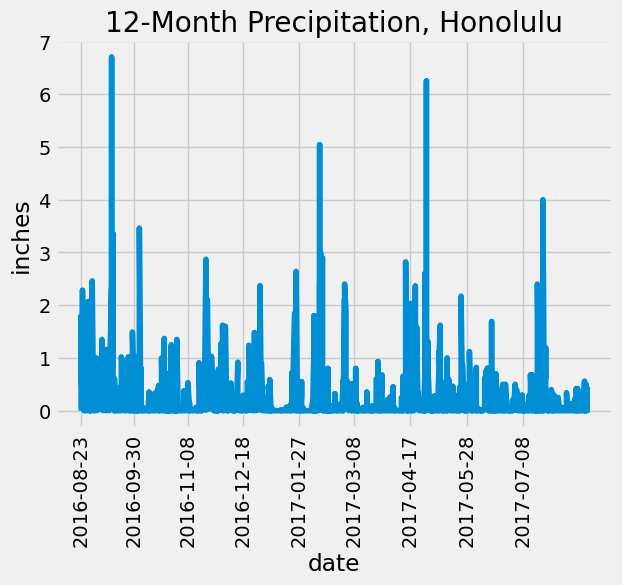

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
sel = [Meas.date, 
       Meas.prcp]

precip = session.query(*sel).\
    filter(func.strftime(Meas.date) >= query_date).\
    filter((Meas.prcp) != None).\
    order_by(Meas.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip, columns=['date', 'precipitation'])


# Sort the dataframe by date
precip_df = precip_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = precip_df['date']
y_axis = precip_df['precipitation']
plt.plot(x_axis, y_axis)
plt.ylabel("inches")
plt.xlabel("date")
plt.title("12-Month Precipitation, Honolulu")
plt.xticks(x_axis, rotation='vertical')
plt.locator_params(axis='x', nbins=9)
plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [42]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query((Meas.station).distinct()).all()
print(len(stations))


9


In [54]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Meas.station, func.count(Meas.date)).\
    group_by(Meas.station).\
    order_by(func.count(Meas.date).desc()).all()
    

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
select = [func.min(Meas.tobs),
         func.max(Meas.tobs),
         func.avg(Meas.tobs)]

session.query(*select).\
    filter(Meas.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

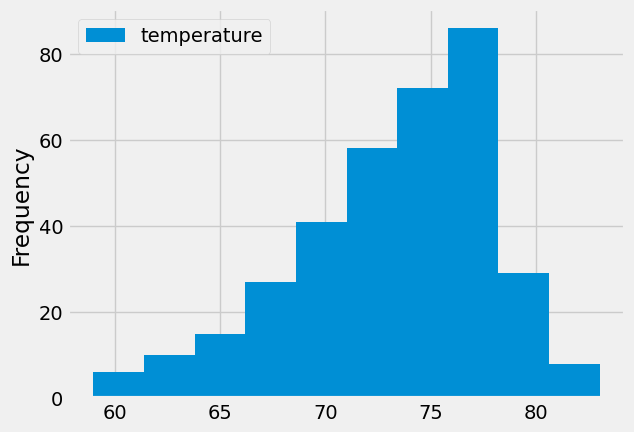

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
select_temp = [Meas.date, Meas.tobs]

temp = session.query(*select_temp).\
    filter(func.strftime(Meas.date) >= query_date).\
    filter(Meas.station == 'USC00519281').all()

temp_df = pd.DataFrame(temp, columns=['date', 'temperature'])

temp_df.plot(kind='hist')
plt.xlabel = "Temperature"
plt.ylabel = "Frequency"



# Close Session

In [73]:
# Close Session
session.close()